In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [61]:
# Load the image
image = tf.io.read_file(r"E:\4th sem\Maths\project\pcb\DeepPCB-master\PCBData\group12000\12000\12000038_temp.jpg")
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[640, 640])

# Preprocess the image
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)



In [83]:
# Define the convolutional model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=image.shape[1:]),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    # layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D((2, 2)),
])

# Apply the model to the image
convolved_image = model(image)


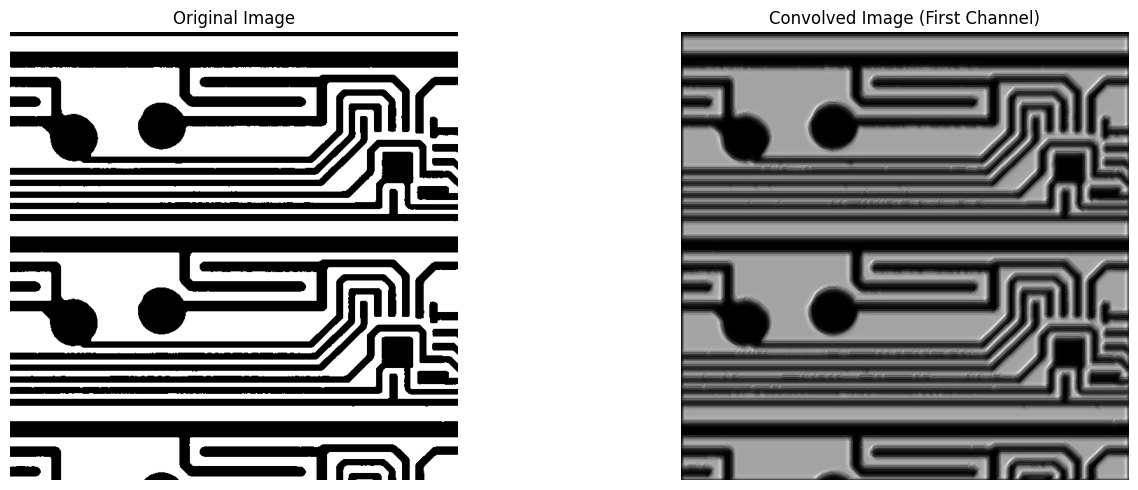

In [84]:
# Plotting
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Original Image')

# Convolved image (showing the first channel of the output)
plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(convolved_image)[..., 0], cmap='gray')
plt.axis('off')
plt.title('Convolved Image (First Channel)')

plt.show()

In [85]:
# Load the image
image1 = tf.io.read_file(r"E:\4th sem\Maths\project\pcb\DeepPCB-master\PCBData\group12000\12000\12000038_test.jpg")
image1 = tf.io.decode_jpeg(image1, channels=1)
image1 = tf.image.resize(image1, size=[640, 640])

# Preprocess the image
image1 = tf.image.convert_image_dtype(image1, dtype=tf.float32)
image1 = tf.expand_dims(image1, axis=0)

In [86]:
convolved_image_1=model(image1)

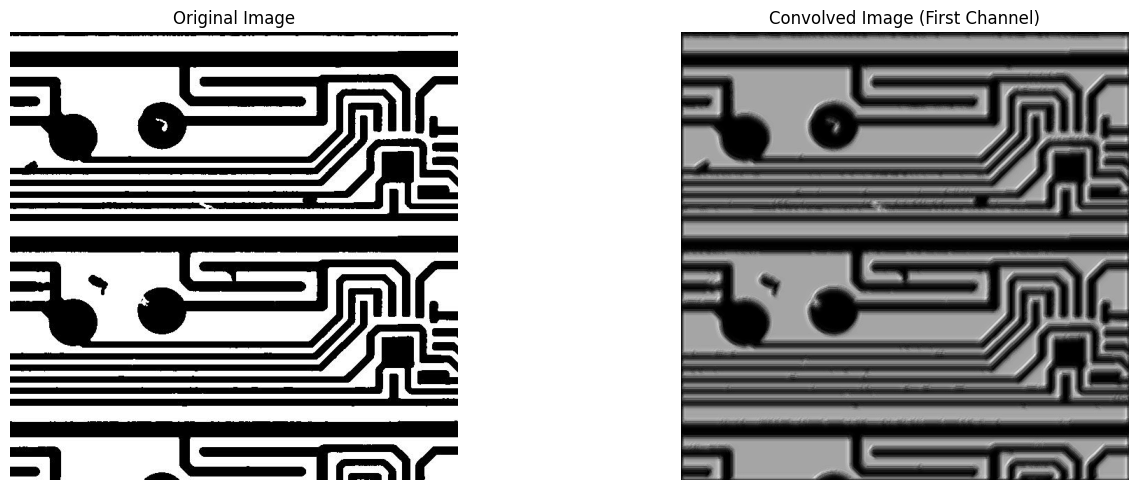

In [89]:
# Plotting
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(tf.squeeze(image1), cmap='gray')
plt.axis('off')
plt.title('Original Image')

# Convolved image (showing the first channel of the output)
plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(convolved_image_1)[..., 0], cmap='gray')
plt.axis('off')
plt.title('Convolved Image (First Channel)')

plt.show()

Text(0.5, 1.0, 'Feature Difference')

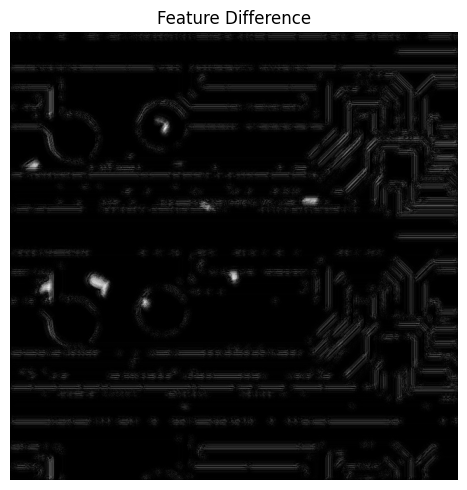

In [88]:

# Compute the feature difference
feature_difference = tf.abs(convolved_image - convolved_image_1)

# Plotting
plt.figure(figsize=(15, 5))
# Feature difference (showing the first channel)
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(feature_difference)[..., 0], cmap='gray')
plt.axis('off')
plt.title('Feature Difference')


In [130]:
import cv2

# Load the image
image_path = r"image.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)  # Adjust thresholds as needed

# Save or display the edge image
cv2.imwrite("edges1.jpg", edges)


True

In [136]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift


def phase_correlation(img1, img2):
  """
  Calculates the phase correlation between two images and identifies the optimal shift.

  Args:
    img1: First image as a 2D numpy array.
    img2: Second image as a 2D numpy array.

  Returns:
    shift: Optimal shift (dx, dy) between the images.
  """

  # Ensure images have the same shape
  if not img1.shape == img2.shape:
    raise ValueError("Images must have the same shape.")

  # Perform 2D fast Fourier transforms
  F1 = fft2(img1)
  F2 = fft2(img2)

  # Calculate normalized cross-power spectrum
  C = np.conj(F2) * F1 / np.abs(np.conj(F2) * F1)

  # Perform inverse 2D fast Fourier transform
  corr = ifft2(C)

  # Find the peak and its location
  max_idx = np.unravel_index(np.argmax(corr), corr.shape)
  shift = tuple(map(lambda x: -x // 2 + 1, max_idx))  # Account for fftshift

  return shift


# Example usage:
img1 = cv2.imread(r"edges.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r"edges1.jpg", cv2.IMREAD_GRAYSCALE)

shift = phase_correlation(img1, img2)
print(f"Optimal shift: ({shift[0]}, {shift[1]})")

# Shift and align the second image based on the result (optional)
shifted_img2 = np.roll(img2, shift, axis=(0, 1))
aligned_images = np.hstack([img1, shifted_img2])
cv2.imwrite("edges0.jpg",shifted_img2)


Optimal shift: (-1, 1)


True

In [113]:
# Display or save the aligned images (optional)
cv2.imshow("Aligned Images", aligned_images)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [138]:
import cv2

def template_matching(img, template):
  """
  Performs template matching on an image with a given template.

  Args:
    img: Main image where the template needs to be found.
    template: Template image to be searched for.

  Returns:
    (top_left, bottom_right, confidence):
      top_left: Coordinates of the top-left corner of the best match.
      bottom_right: Coordinates of the bottom-right corner of the best match.
      confidence: Normalized correlation coefficient indicating the match quality.
  """

  # Convert images to grayscale (if needed)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

  # Define the template matching method (e.g., normalized correlation coefficient)
  method = cv2.TM_CCOEFF_NORMED

  # Perform template matching
  result = cv2.matchTemplate(img_gray, template_gray, method)

  # Find the minimum and maximum correlation coefficients
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

  # Extract match location and confidence score
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + template_gray.shape[0], top_left[1] + template_gray.shape[1])
  confidence = max_val

  return top_left, bottom_right, confidence

# Example usage:
img = cv2.imread("edges1.jpg")
template = cv2.imread("edges.jpg")

top_left, bottom_right, confidence = template_matching(img, template)

# Draw bounding box and confidence around the match (optional)
if confidence > 0.8:  # Set your desired confidence threshold here
  cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
  cv2.putText(img, f"Confidence: {confidence:.2f}", (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display the image with the match (optional)
cv2.imshow("Image with Template", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("edges2.jpg", img)

True

In [177]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Read the images
img1 = tf.io.read_file("template.jpg")
img2 = tf.io.read_file("image.jpg")

# Decode the images
img1 = tf.io.decode_jpeg(img1, channels=1)  # Assuming grayscale images
img2 = tf.io.decode_jpeg(img2, channels=1)  # Assuming grayscale images

# Read and decode the edges image
edges_img = tf.io.read_file("edges.jpg")
edges_img = tf.io.decode_jpeg(edges_img, channels=1)  # Assuming grayscale image

# Compute the feature difference
feature_difference = tf.abs(tf.cast(img2, tf.float32) - tf.cast(img1, tf.float32) - tf.cast(edges_img, tf.float32))
# feature_difference = tf.abs(tf.cast(img2, tf.float32) - tf.cast(img1, tf.float32))

# Convert the feature difference tensor to a NumPy array
feature_difference_np = feature_difference.numpy()

# Save the image using OpenCV
cv2.imwrite("Processed.jpg", feature_difference_np)


True

In [143]:
import cv2
import numpy as np

def feature_based_alignment(img1, img2):
    """
    Aligns two images using SIFT features and homography transformation.

    Args:
        img1: First image as a 2D numpy array.
        img2: Second image as a 2D numpy array.

    Returns:
        aligned_img2: Transformed second image to align with the first image.
    """

    # Create SIFT feature detector and matcher
    sift = cv2.SIFT_create()

    # Detect keypoints and descriptors in both images
    kp1, desc1 = sift.detectAndCompute(img1, None)
    kp2, desc2 = sift.detectAndCompute(img2, None)

    # Match keypoints between the images
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)  # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(desc1, desc2, k=2)

    # Filter good matches based on ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Check if enough good matches were found
    if len(good_matches) > 4:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Find homography transformation
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Warp the second image based on the homography
        h, w = img2.shape[:2]
        aligned_img2 = cv2.warpPerspective(img2, M, (w, h))
        return aligned_img2
    else:
        print("Not enough matches found - images might be too different.")
        return None

# Example usage:
img1 = cv2.imread("edges.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("edges1.jpg", cv2.IMREAD_GRAYSCALE)

aligned_img2 = feature_based_alignment(img1, img2)

cv2.imwrite("edges3.jpg",aligned_img2)

if aligned_img2 is not None:
    # Display or save the aligned images (optional)
    cv2.imshow("Aligned Images", np.hstack([img1, aligned_img2]))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Alignment failed.")


In [155]:
import cv2
import numpy as np

def align_images(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Detect ORB keypoints and descriptors
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)
    
    # Match keypoints using Brute-Force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    
    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Extract matched keypoints
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    
    # Estimate perspective transformation
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    # Warp the second image using the estimated transformation
    aligned_img2 = cv2.warpPerspective(img2, M, (img1.shape[1], img1.shape[0]))
    
    return aligned_img2

# Load the images
img1 = cv2.imread('template.jpg')
img2 = cv2.imread('image.jpg')

# Align the images
aligned_img2 = align_images(img1, img2)

cv2.imwrite("edges4.jpg",aligned_img2)

# Display the aligned images
cv2.imshow('Aligned Image 2', aligned_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [158]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def visualize_differences(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute Structural Similarity Index (SSI)
    ssi_score, diff = ssim(gray1, gray2, full=True)

    # Scale the difference image to the range [0, 255]
    diff = (255 * diff).astype(np.uint8)

    # Threshold the difference image
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original images to visualize differences
    result1 = img1.copy()
    result2 = img2.copy()
    cv2.drawContours(result1, contours, -1, (0, 0, 255), 2)  # Red contours on original image
    cv2.drawContours(result2, contours, -1, (0, 0, 255), 2)  # Red contours on original image

    return result1, result2

# Load the images
img1 = cv2.imread('edges1.jpg')
img2 = cv2.imread('image.jpg')

# Visualize the differences
highlighted_img1, highlighted_img2 = visualize_differences(img1, img2)

cv2.imwrite("diff.jpg",highlighted_img2)

# Display the images with differences highlighted
cv2.imshow('Highlighted Differences in Image 2', highlighted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [154]:
import cv2
import numpy as np

def visualize_optical_flow(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Use Lucas-Kanade method to calculate optical flow
    lk_params = dict(winSize=(15, 15),
                     maxLevel=2,
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7)
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Create a mask image for drawing purposes
    mask = np.zeros_like(img1)

    # Draw lines between the corresponding points
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        mask = cv2.line(mask, (a, b), (c, d), (0, 255, 0), 2)
        img2 = cv2.circle(img2, (a, b), 5, (0, 0, 255), -1)

    # Add the mask image to the second image to visualize motion
    result = cv2.add(img2, mask)

    return result

# Load the images
img1 = cv2.imread('template.jpg')
img2 = cv2.imread('image.jpg')

# Visualize the differences using optical flow
result = visualize_optical_flow(img1, img2)

# Display the result
cv2.imshow('Optical Flow Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
